In [1]:
import sys
import os
sys.path.append(os.path.abspath('../..'))


# from scan_engine.status_fields_config_24summ import STATUS_FIELDS_CONFIG
from status_fields_config_oct3v1_brws_250430 import STATUS_FIELDS_CONFIG

from utlis.scan_engine_utlis.scan_eng_big_utlis import log_folder_to_parquet_sep

if __name__ == "__main__":
    base_folder = "/data/big_rim/rsync_dcc_sum/25Apri_social" #"/data/big_rim/rsync_dcc_sum/Oct3V1" #"/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ"  # Replace with your base folder
    # save_path = os.path.join(base_folder, 'paret')
    failed_paths_file = None #'/data/big_rim/rsync_dcc_sum/Oct3V1/sync_failed_brws.txt'  # File containing failed paths


    force_rescan_rec_files = [
        # ('2023-10-01', '001'),
        # ('2023-10-02', '002'),
        # Add more as needed
    ]
    rescan_threshold_days = 0.001 # 7 days, but guess if i mess up i can just change it to automatically rescan all, smile... #0.1

    log_folder_to_parquet_sep(base_folder, failed_paths_file, STATUS_FIELDS_CONFIG,
                              force_rescan_rec_files=force_rescan_rec_files,
                              rescan_threshold_days=rescan_threshold_days)


No new or modified folders to scan.


In [2]:
# sys.path.append(os.path.abspath('../..'))
from utlis.scan_engine_utlis.scan_engine_utlis import read_all_parquet_files
# base_folder = "/data/big_rim/rsync_dcc_sum/Oct3V1" 
all_df = read_all_parquet_files(base_folder)

/data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_02/1shank3KOM_boxedshank3KOF
plotting com_traga for /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_02/1shank3KOM_boxedshank3KOF


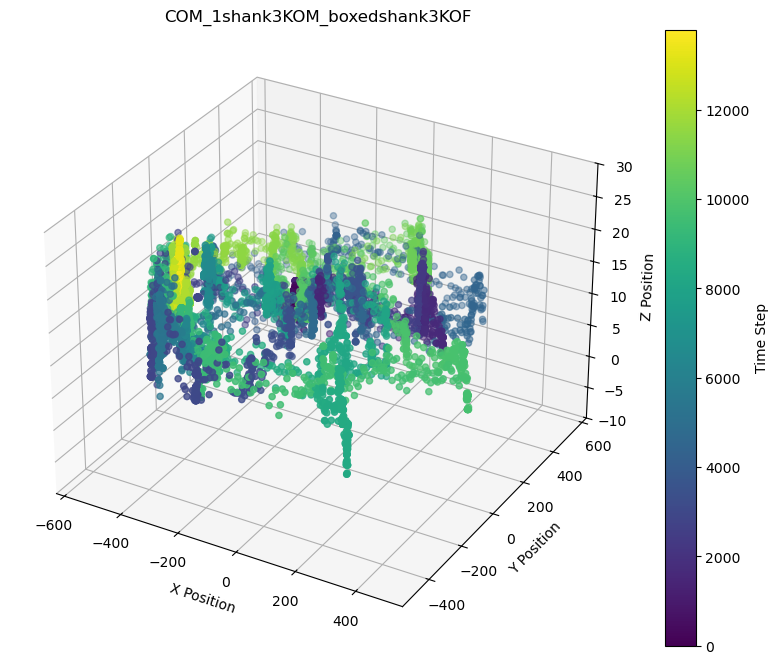

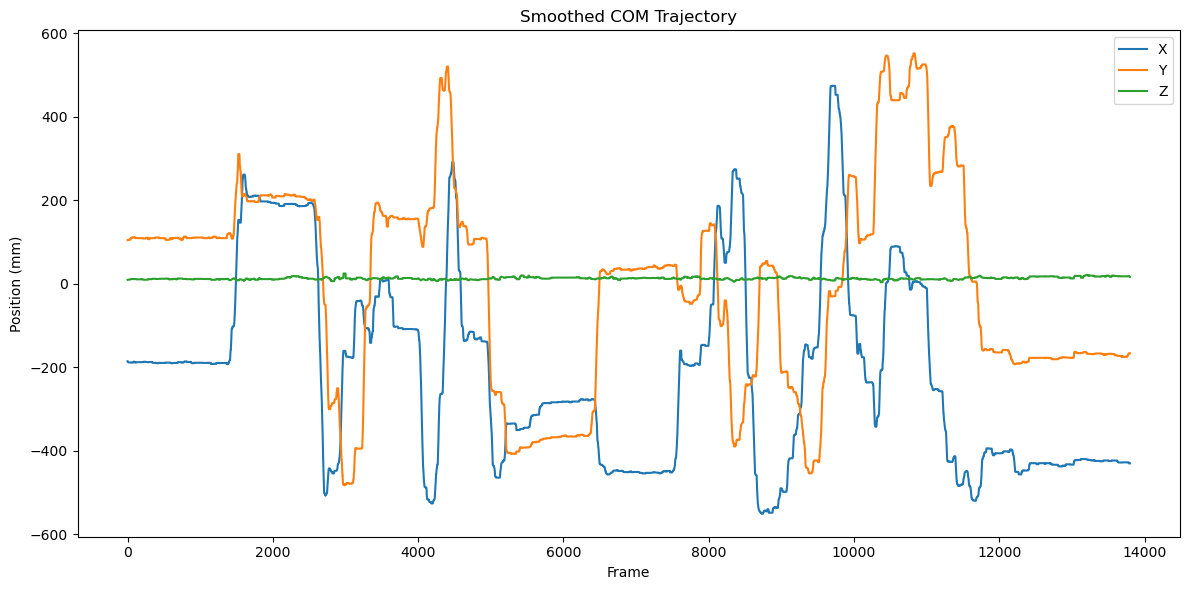

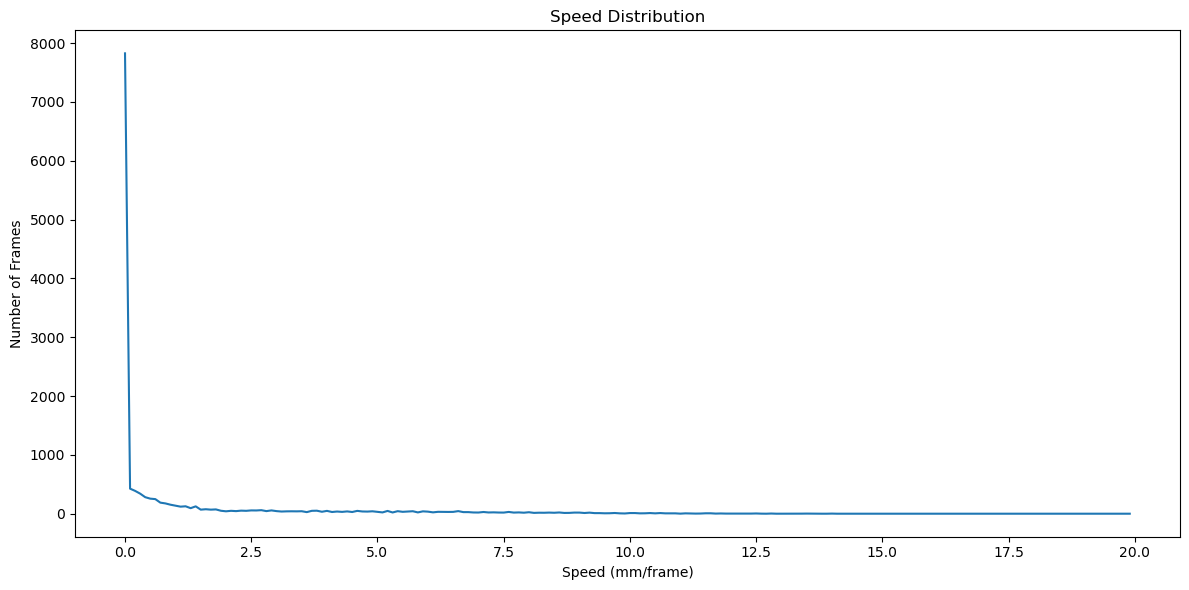

Analysis complete. Plots saved to: /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_02/1shank3KOM_boxedshank3KOF/COM/predict00/vis
/data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_02/1shank3WTM_boxedshank3WTF
plotting com_traga for /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_02/1shank3WTM_boxedshank3WTF


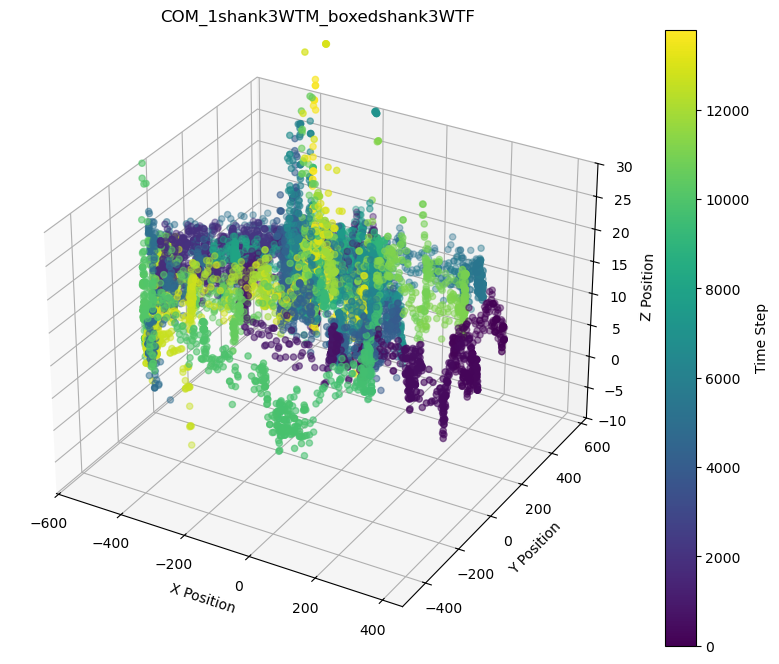

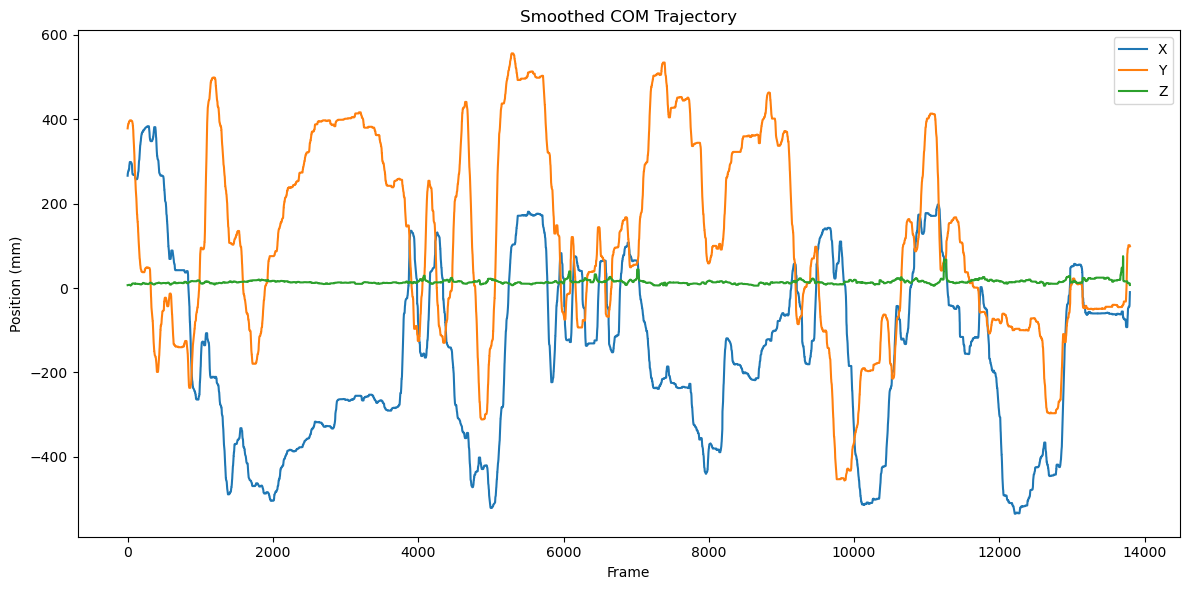

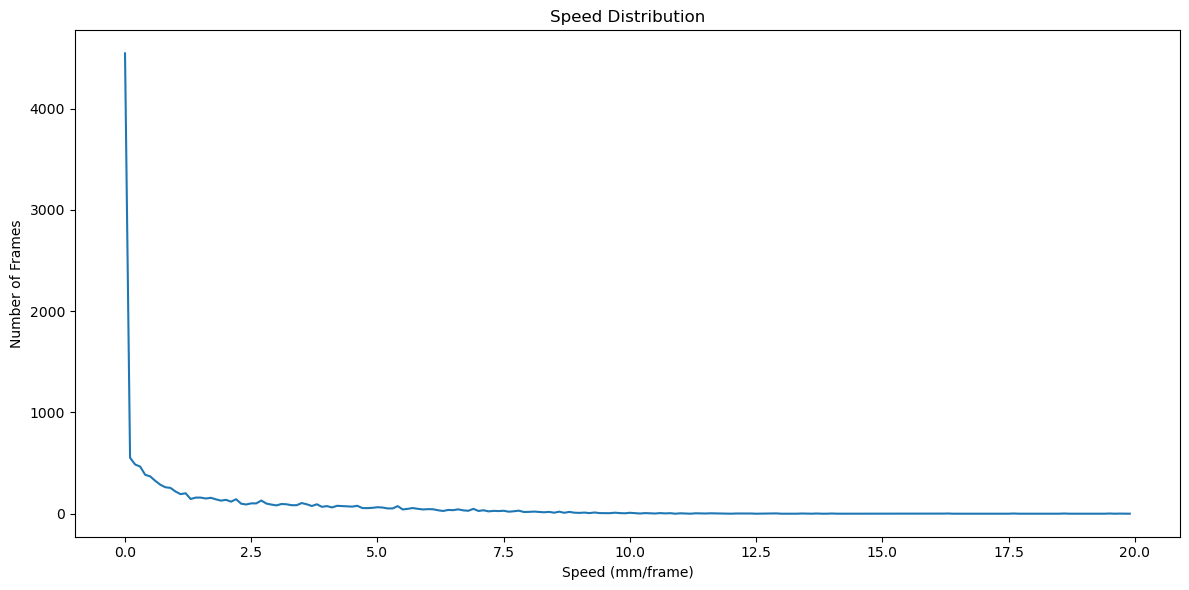

Analysis complete. Plots saved to: /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_02/1shank3WTM_boxedshank3WTF/COM/predict00/vis


In [3]:
from utlis.vis_valid_utlis.com_trag_updated import plot_com_all

records = [
    {
        'date_folder': date_folder.as_py(),  # Convert to string using as_py()
        'rec_file': rec_file.as_py()         # Convert to string using as_py()
    }
    for date_folder, rec_file in zip(all_df['date_folder'], all_df['rec_file'])
]

# Iterate through the records and process each one sequentially
for record in records:
    base_path = f"{base_folder}/{record['date_folder']}/{record['rec_file']}"
    print(base_path)
    plot_com_all(base_path, ) 

In [6]:
# import pyarrow.compute as pc
# from functools import reduce

# table = all_df  # combined_df
# conditions = [
#    pc.equal(table['dannce'], '1'),
#    pc.equal(table['social'], '0'),
# #    pc.equal(table['quality'], 'good_vein')
# # quality_mask
# ]

# filter_mask = reduce(pc.and_, conditions)
# # Apply the filter and print the results
# # for_dappy = table.filter(filter_mask) #filter_mask
# for_dappy = table.filter(pc.equal(table['dannce'], '1'))
# # Print each row of the filtered table
# print(for_dappy.to_pandas())  # Display the filtered data in a familiar pandas-like format


In [4]:
import os
import re
import csv
import pandas as pd  # Required for reading metadata.csv
from datetime import datetime

# Assuming for_dappy is your PyArrow Table and base_folder is defined

data_list = []
for_dappy = all_df
# Convert PyArrow Table to list of dictionaries
rows = for_dappy.to_pylist()

def clean_animal_id(rec_file):
    """Extract and clean the AnimalID from rec_file."""
    cleaned = re.sub(r'_(test|cricket|acrylic|hole|cyliner|left|right|AO|BO|single|dead|all|cylinder|righthole|lefthole).*', '', rec_file, flags=re.IGNORECASE)
    cleaned = re.sub(r'_\d{1,2}_\d{2}(_.*)?$', '', cleaned)
    cleaned = re.sub(r'_V(\d+)_r(\d+)', r'V\1r\2', cleaned)
    cleaned = re.sub(r'NMCFS', '_no_hole', cleaned)
    return cleaned

def extract_time(rec_file):
    """Extract time in HH:MM format from rec_file."""
    time_match = re.search(r'_(\d{2})_(\d{2})$', rec_file)
    if time_match:
        hour, minute = time_match.groups()
        return f"{hour}:{minute}"
    return ''

def extract_recording_time(videos_path):
    """Extract the recording time from metadata.csv."""
    metadata_path = os.path.join(videos_path, "Camera3", "metadata.csv")
    if not os.path.exists(metadata_path):
        return None
    try:
        # Read the metadata.csv file
        metadata = pd.read_csv(metadata_path, header=None, names=['Key', 'Value'])
        
        # Ensure the structure is consistent
        if 'totalTime' in metadata['Key'].values:
            # Extract the value associated with 'totalTime'
            total_time = metadata.loc[metadata['Key'] == 'totalTime', 'Value'].values[0]
            return float(total_time)
        else:
            print(f"'totalTime' column not found in {metadata_path}. Keys available: {list(metadata['Key'].values)}")
    except Exception as e:
        print(f"Error reading metadata.csv in {videos_path}: {e}")
    return "N/A"



def is_true(value):
    """Check if the value logically translates to True."""
    try:
        return float(value) == 1.0
    except (ValueError, TypeError):
        return False

for row in rows:
    date_folder = row['date_folder']
    rec_file = row['rec_file']
    miniscope = row.get('miniscope', '0')
    after_oxytocin = row.get('after_oxytocin', '0')
    before_oxytocin = row.get('before_oxytocin', '0')
    social = row.get('social', '0')
    habituation = row.get('habituation', '0')
    saline = row.get('saline', '0')
    test = row.get('test', '0')
    caffeine = row.get('caffeine', '0')

    # Check if cricket exists in the name
    cricket = '1' if 'cricket' in rec_file.lower() else '0'

    # Prediction path
    Prediction_path = f"{base_folder}/{date_folder}/{rec_file}/DANNCE/predict00/save_data_AVG.mat"

    # Extract AnimalID and Time
    AnimalID = clean_animal_id(rec_file)
    time_formatted = extract_time(rec_file)

    # If time_formatted is empty, get time from videos folder
    if not time_formatted:
        videos_path = f"{base_folder}/{date_folder}/{rec_file}/videos"
        if os.path.exists(videos_path):
            mod_time = os.path.getmtime(videos_path)
            dt = datetime.fromtimestamp(mod_time)
            time_formatted = dt.strftime('%H:%M')
        else:
            time_formatted = ''

    # Extract recording time from metadata.csv
    videos_path = f"{base_folder}/{date_folder}/{rec_file}/videos"
    recording_time = extract_recording_time(videos_path)

    # Date
    date = date_folder

    # Sex
    Sex = 'male'

    # Collect applicable conditions
    conditions = []
    if is_true(test):
        conditions.append('test')
    if is_true(miniscope):
        conditions.append('miniscope')
    if is_true(social):
        conditions.append('social')
    if is_true(after_oxytocin):
        conditions.append('after_oxytocin')
    if is_true(before_oxytocin):
        conditions.append('before_oxytocin')
    if is_true(habituation):
        conditions.append('habituation')
    if is_true(saline):
        conditions.append('saline')
    if is_true(caffeine):
        conditions.append('caffeine')
    if is_true(cricket):
        conditions.append('cricket')

    # Join conditions into a single string
    Condition = ','.join(conditions) if conditions else 'baseline'

    # Baseline logic
    baseline = '1' if 'baseline' in Condition else '0'

    # Append data row
    data_list.append({
        'AnimalID': AnimalID,
        'Sex': Sex,
        'Condition': Condition,
        'date': date,
        'time': time_formatted,
        'Prediction_path': Prediction_path,
        'miniscope': miniscope,
        'after_oxytocin': after_oxytocin,
        'before_oxytocin': before_oxytocin,
        'social': social,
        'habituation': habituation,
        'saline': saline,
        'test': test,
        'caffeine': caffeine,
        'cricket': cricket,
        'baseline': baseline,
        'recording_time': recording_time if recording_time else 'N/A'
    })

# Save to CSV
csv_columns = ['AnimalID', 'Sex', 'Condition', 'date', 'time', 'Prediction_path', 
               'miniscope', 'after_oxytocin', 'before_oxytocin', 'social', 
               'habituation', 'saline', 'test', 'caffeine', 'cricket', 
               'baseline', 'recording_time']

csv_file = os.path.join('/home/lq53/mir_repos/dappy_24_nov/mir_modif_dappy/meta_datas', '250429' + os.path.basename(base_folder) + '.csv')

try:
    with open(csv_file, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        writer.writerows(data_list)
    print(f"CSV file saved to {csv_file}")
except IOError:
    print("I/O error occurred while writing the CSV file.")

CSV file saved to /home/lq53/mir_repos/dappy_24_nov/mir_modif_dappy/meta_datas/25042925Apri_social.csv


In [ ]:
# import pyarrow as pa
# import os
# from datetime import datetime
# import re
# import csv

# # Assuming for_dannce_vis is your PyArrow Table and base_folder is defined

# data_list = []

# # Convert the PyArrow Table to a list of dictionaries
# rows = for_dappy.to_pylist()

# def extract_animalid_and_time(rec_file):
#     parts = rec_file.split('_')
#     # Remove 'test' if it is the last part
#     if parts[-1].lower() == 'test':
#         parts.pop()
#     time_formatted = ''
#     # Check for time at the end
#     if len(parts) >= 1:
#         last_part = parts[-1]
#         # Match 'HHMM' format
#         if re.match(r'^\d{4}$', last_part):
#             time_str = parts.pop()
#             time_formatted = f"{time_str[:2]}:{time_str[2:]}"
#         # Match 'HH_MM' format
#         elif re.match(r'^\d{1,2}$', last_part) and len(parts) >= 2 and re.match(r'^\d{1,2}$', parts[-2]):
#             minute = parts.pop()
#             hour = parts.pop()
#             time_formatted = f"{hour.zfill(2)}:{minute.zfill(2)}"
#         else:
#             # Check if the last 4 characters are digits (time in 'HHMM' format without underscores)
#             if rec_file[-4:].isdigit():
#                 time_str = rec_file[-4:]
#                 time_formatted = f"{time_str[:2]}:{time_str[2:]}"
#                 animalid = rec_file[:-4]
#                 return animalid, time_formatted
#     animalid = '_'.join(parts)
#     return animalid, time_formatted

# for row in rows:
#     date_folder = row['date_folder']
#     rec_file = row['rec_file']
#     social = row.get('social', '0')
#     miniscope = row.get('miniscope', '0')
#     test = row.get('test', '0')
#     after_oxytocin = row.get('after_oxytocin', '0')
#     before_oxytocin = row.get('before_oxytocin', '0')

#     # Prediction_path
#     Prediction_path = f"{base_folder}/{date_folder}/{rec_file}/DANNCE/predict00/save_data_AVG.mat"

#     # Extract AnimalID and Time
#     AnimalID, time_formatted = extract_animalid_and_time(rec_file)

#     # If time_formatted is empty, attempt to get time from 'videos' folder
#     if not time_formatted:
#         videos_path = f"{base_folder}/{date_folder}/{rec_file}/videos"
#         if os.path.exists(videos_path):
#             mod_time = os.path.getmtime(videos_path)
#             dt = datetime.fromtimestamp(mod_time)
#             time_formatted = dt.strftime('%H:%M')
#         else:
#             time_formatted = ''

#     # Date
#     date = date_folder

#     # Sex
#     Sex = 'male'

#     # Collect applicable conditions
#     def is_true(value):
#         try:
#             return float(value) == 1.0
#         except (ValueError, TypeError):
#             return False

#     conditions = []
#     if is_true(test):
#         conditions.append('test')
#     if is_true(miniscope):
#         conditions.append('miniscope')
#     if is_true(social):
#         conditions.append('social')
#     if is_true(after_oxytocin):
#         conditions.append('after_oxytocin')
#     if is_true(before_oxytocin):
#         conditions.append('before_oxytocin')

#     # Join conditions into a single string
#     Condition = ','.join(conditions) if conditions else 'baseline'

#     # Collect data
#     data_list.append({
#         'AnimalID': AnimalID,
#         'Sex': Sex,
#         'Condition': Condition,
#         'date': date,
#         'time': time_formatted,
#         'Prediction_path': Prediction_path
#     })

# # Save to CSV
# csv_columns = ['AnimalID', 'Sex', 'Condition', 'date', 'time', 'Prediction_path']
# csv_file = os.path.join('/hpc/group/tdunn/lq53/dappy_24_nov/mir_modif_dappy/meta_datas', os.path.basename(base_folder) + '.csv')

# try:
#     with open(csv_file, 'w', newline='') as csvfile:
#         writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
#         writer.writeheader()
#         writer.writerows(data_list)
#     print(f"CSV file saved to {csv_file}")
# except IOError:
#     print("I/O error occurred while writing the CSV file.")


CSV file saved to /hpc/group/tdunn/lq53/dappy_24_nov/mir_modif_dappy/meta_datas/Oct3V1.csv
